In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

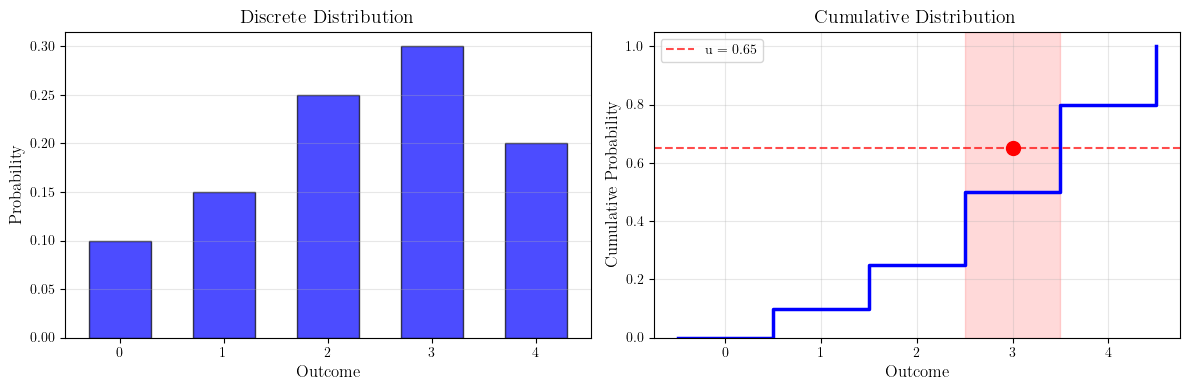

In [ ]:
probs = np.array([0.1, 0.15, 0.25, 0.3, 0.2])
x_vals = np.arange(len(probs))
cumsum = np.cumsum(probs)
u = 0.65
idx = np.searchsorted(cumsum, u, side='right')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(x_vals, probs, width=0.6, alpha=0.7, edgecolor='black', color='blue')
ax1.set_xlabel('Outcome', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title('Discrete Distribution', fontsize=14)
ax1.set_xticks(x_vals)
ax1.grid(True, alpha=0.3, axis='y')

ax2.step(np.concatenate([[-0.5], x_vals + 0.5]), 
         np.concatenate([[0], cumsum]), where='post', lw=2.5, color='blue')
ax2.axhline(y=u, linestyle='--', alpha=0.7, label=f'u = {u}', color='red')
ax2.axvspan(idx - 0.5, idx + 0.5, alpha=0.15, color='red')
ax2.scatter([idx], [u], s=100, zorder=5, color='red')
ax2.set_xlabel('Outcome', fontsize=12)
ax2.set_ylabel('Cumulative Probability', fontsize=12)
ax2.set_title('Cumulative Distribution', fontsize=14)
ax2.set_xticks(x_vals)
ax2.set_ylim(0, 1.05)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../../figs/monte_carlo/discrete_sampling.pdf')
plt.show()

/var/folders/g9/q8qv40895cv4llyvvlj1b_380000gn/T/ipykernel_72188/1595808293.py:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  pdf = pdf / np.trapz(pdf, x)  # normalize


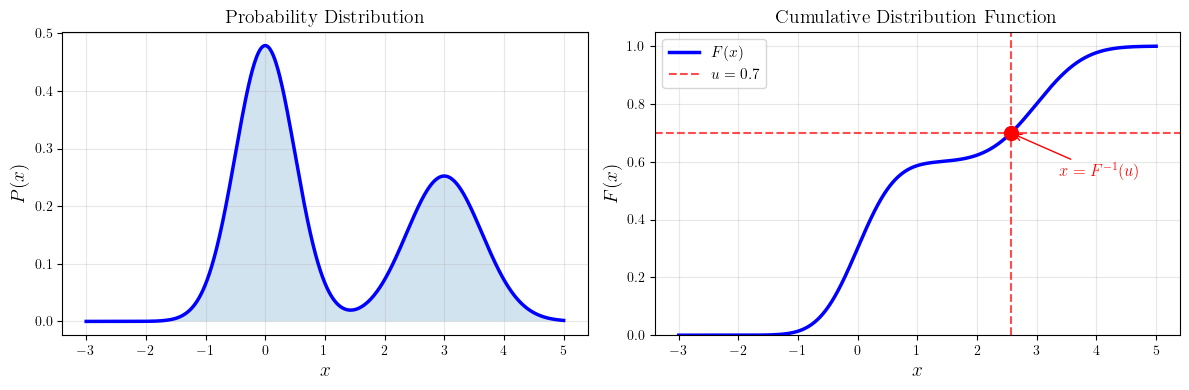

In [7]:
x = np.linspace(-3, 5, 1000)
pdf = 0.6*np.exp(-(x-0)**2/0.5) / np.sqrt(0.5*np.pi) + \
      0.4*np.exp(-(x-3)**2/0.8) / np.sqrt(0.8*np.pi)
pdf = pdf / np.trapz(pdf, x)  # normalize
cdf = np.cumsum(pdf) * (x[1] - x[0])
cdf = cdf / cdf[-1]  # ensure CDF ends at 1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x, pdf, 'b-', lw=2.5)
ax1.fill_between(x, 0, pdf, alpha=0.2)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$P(x)$', fontsize=14)
ax1.set_title('Probability Distribution', fontsize=14)
ax1.grid(True, alpha=0.3)

ax2.plot(x, cdf, 'b-', lw=2.5, label='$F(x)$')
u_sample = 0.7
x_sample = x[np.argmin(np.abs(cdf - u_sample))]
ax2.axhline(y=u_sample, color='red', linestyle='--', alpha=0.7, 
            label=f'$u = {u_sample}$')
ax2.axvline(x=x_sample, color='red', linestyle='--', alpha=0.7)
ax2.scatter([x_sample], [u_sample], c='red', s=100, zorder=5)
ax2.annotate(f'$x = F^{{-1}}(u)$', xy=(x_sample, u_sample), 
             xytext=(x_sample+0.8, u_sample-0.15),
             fontsize=12, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_ylabel('$F(x)$', fontsize=14)
ax2.set_title('Cumulative Distribution Function', fontsize=14)
ax2.set_ylim(0, 1.05)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../../../figs/monte_carlo/inverse_transform.pdf')
plt.show()